### Let $X_i$ $\in \{H,T\}$ be the outcome of $i_{th}$ toss. If we know $\theta$, we automatically know the distribution of $X_i$: 


$$p(X_i=H|θ)=θ$$


### Now, $$ p(X = H|θ) = \theta $$ &  $$p(X = T | \theta) = 1 - \theta$$

### If there are n coin tosses $$p(X|\theta) = \prod_{i=1}^n p_i$$
 


# Posterior $\propto$ Prior Likelihood

### p( $\theta$ | D)  $\propto $ p( $\theta $) p(D |  $\theta $) 

###                                            Beta                 Binomial 

In [20]:
import numpy as np
import pymc3 as pm
import scipy as sp
from matplotlib import pylab as plt

In [8]:
x_beta_binomial =  (np.random.randint(2, size=10)).astype(float)
x_beta_binomial

array([0., 0., 0., 1., 1., 0., 1., 0., 0., 0.])

In [9]:
with pm.Model() as beta_binomial_model:
    p_beta_binomial = pm.Uniform('p', 0., 1.)

In [10]:
with beta_binomial_model:
    x_obs = pm.Bernoulli('y',p_beta_binomial, observed = x_beta_binomial)

# MCMC Solution

### We sample this from a markov chain for a long time and estimate the values



In [14]:
SEED = 42

In [15]:

with beta_binomial_model:
    beta_binomial_trace_ = pm.sample(BETA_BINOMIAL_SAMPLES, random_seed=SEED)

beta_binomial_trace = beta_binomial_trace_[BETA_BINOMIAL_BURN::BETA_BINOMIAL_THIN]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/nilavro/irleak/lib/python3.5/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_interval__]
 24%|██▎       | 11941/50500 [00:05<00:16, 2333.06it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10881' (I am process '10882')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/nilavro/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-16.04-xenial-x86_64-3.5.2-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '10881' (I am process '10883')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/nilavro/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu

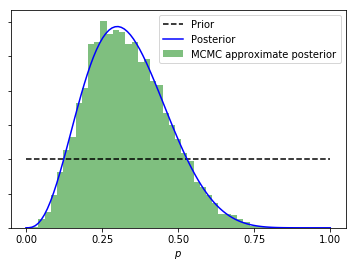

In [22]:
fig, ax = plt.subplots()

prior = sp.stats.uniform(0, 1)
posterior = sp.stats.beta(1 + x_beta_binomial.sum(), 1 + (1 - x_beta_binomial).sum())

plot_x = np.linspace(0, 1, 100)
ax.plot(plot_x, prior.pdf(plot_x),
        '--', c='k', label='Prior');

ax.plot(plot_x, posterior.pdf(plot_x),
        c='blue', label='Posterior');

ax.set_xticks(np.linspace(0, 1, 5));
ax.set_xlabel(r'$p$');

ax.set_yticklabels([]);

ax.legend(loc=1);

bins = np.linspace(0, 1, 50)
ax.hist(beta_binomial_trace['p'], bins=bins, normed=True,
        color='green', lw=0., alpha=0.5,
        label='MCMC approximate posterior');

ax.legend();

# Variational Inference 

In [25]:
%%time
with beta_binomial_model:
    advi_fit = pm.ADVI(n=20000, random_seed=SEED)

CPU times: user 2.65 ms, sys: 0 ns, total: 2.65 ms
Wall time: 2.34 ms
